In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 통계
- 교재: 챕터2(p. 30 ~ )
- 예제: 책표지(아래쪽) -> 소스코드 다운로드
  - 교재의 예제는 직접 다운로드 해주세요

- 통계란? 
  - 관찰(수집)된 자료(현상/상태)에 대해서 통계적(수치적)으로 처리하고 연구
  - 기술통계와 추론통계

## 기술통계
- 기초통계를 이용해서 자료의 성질(특성)을 확인(설명)하는 것
- 자료의 요약된 정보
  - 자료의 자세한 정보 까지는 확인할 수 없습니다. 
    - 자료의 세세한 정보까지 확인이 가능하면, 통계 없이 확인 가능한 정도로 아주 작은 파일
    - 즉, 빅데이터에서 아주아주 큰 파일에 대해서 확인할 수 있는 방법은 통계외에는 접근하는 방법조차 없습니다. 
    - 자료의 아주 세세한 정보는 통계에 있어서는 큰 관심사가 되지 않습니다. 
  - 자료의 커다란 특성을 확인할 수 있습니다. 
  - 통계가 아니고는 대용량의 자료를 설명할 방법이 없습니다. 

- 통계적 수치(통계량)
  - 중심에 대한 통계(교재: 2.1 데이터 중심의 지표)
  - 산포에 대한 통계(교재: 2.2 데이터의 산포도 지표)
  - 관계에 대한 통계(교재: 3.1 두 데이터 사이의 관계를 나타내는 지표)
  - 형태에 대한 통계

### 중심에 대한 통계
- 자료의 중심에 대한 경향을 나타내는 수치
- 평균: 자료에 대한 평균(모평균/표본평균/샘플평균)
- 중앙값: 자료의 50%에 해당하는 값
  - 자료를 정렬했을 때, 가운데 오는 값
- 최빈값: 가장 많이 등장하는 값

#### 평균 구하기  // mean

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/데이터교육/수업자료/통계와 확률/소스코드/data/ch2_scores_em.csv')
df.head(2)

,student number,english,mathematics
0,1,42,65
1,2,69,80


In [ ]:
# 학생 10명의 영어점수
df['english'][:10]

0    42
1    69
2    56
3    41
4    57
5    48
6    65
7    49
8    65
9    58
Name: english, dtype: int64

In [ ]:
scores = np.array( df['english'][:10] )
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [ ]:
sum(scores) / len(scores)

55.0

In [ ]:
np.mean( scores )

55.0

In [ ]:
df['english'][:10].mean()

55.0

#### 중앙값 구하기  // median

In [ ]:
sort_scores = np.sort( scores )
sort_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [ ]:
len(sort_scores) // 2

5

In [ ]:
size = len(sort_scores)
if size % 2 == 0:
  m0 = sort_scores[size//2 - 1]
  m1 = sort_scores[size//2]
  mid = (m0 + m1) / 2
else:
  mid = sort_scores[(size+1)//2-1]

mid

56.5

In [ ]:
np.median( scores )

56.5

In [ ]:
df['english'][:10].median()

56.5

#### 최빈값 구하기  // mode

- np는 최빈값을 지원안함

In [ ]:
pd.Series( scores ).mode()

0    65
dtype: int64

In [ ]:
df['english'][:10].mode()

0    65
dtype: int64

### 산포에 대한 통계
- 자료의 변동성을 나타내는 수치
  - 자료들이 중심으로부터 얼마나 멀리 떨어져 있는가의 정도를 나타내는 수치 
- 편차 (deviation ) : 관측(수집)값과 평균의 차이
  - 평균(중심)으로부터 얼마나 멀리 떨어져 있는가
- 변동( variation ) : 편차의 제곱합
- 분산( variance ) : 변동을 데이터의 수로 나눈 갑
- 표준편차( Standard Deviation ) : 분산의 제곱근

In [ ]:
mean = np.mean( scores )

# 관측 값과 평균의 차이
deviation = mean - scores
deviation

array([ 13., -14.,  -1.,  14.,  -2.,   7., -10.,   6., -10.,  -3.])

#### 변동 구하기

In [ ]:
variation = np.sum( deviation ** 2 )
variation

860.0

#### 분산 구하기
- np, df의 series가 계산하는 값이 다르다

In [ ]:
variation / len( scores ) 

86.0

In [ ]:
np.var( scores) 

86.0

In [ ]:
df['english'][:10].var()

95.55555555555556

In [ ]:
variation / ( len( scores ) -1 ) 

95.55555555555556

아래와 같이 파라미터를 통해 값을 동일하게 만들어줄 수 있다

In [ ]:
df['english'][:10].var(ddof=0)

86.0

#### 표준편차

In [ ]:
np.std( scores )

9.273618495495704

In [ ]:
df['english'][:10].std()

9.775252199076787

#### 판다스는 이러한 통계량을 한 번에 계산

In [ ]:
df['english'][:10].describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
Name: english, dtype: float64

#### 표준화와 편차
- 데이터에서 평균을 빼고 표준편차로 나누는 작업
  - 자료들이 서로 다른 분포를 가지고 있다면, 비교 작업이 어렵다.
  - 자료들이 정규분포임이 가정 즉, 정규분포가 아니라면 최선이 아닐 수 있다. 
  - 평균이나 분산에 상관 없이 표준화된 지표를 얻을 수 있다.

- 최소/최대, Robust, ... 

In [ ]:
z = (scores - mean) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

평균이 0이고 표준편차는 1이 됩니다.

In [ ]:
np.mean(z), np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

편차값
- 평균이 50, 표준편차가 10이 되도록 정규화
- 편차값이 50이면 평균적인 결과
- 50보다 클수록 상위 결과라는 의미로 해석

In [ ]:
z = 50 + 10 * ( scores - mean ) / np.std( scores )

In [ ]:
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [ ]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

### 관계에 대한 통계
- 자료와 자료간의 관계를 나타내는 수치
  - 수치일 뿐, 실제 관계를 수치만 가지고 정확하게 표현할 수 없다.
  - 수치를 가지고 해석하는 것은 분석하는 사람의 몫

1. 상관관계
- 공분산(Co-variance)
- 두 변수 사이의 분산 
  - 결과적으로 두 변수의 분산이 같이 커지거나, 작아지면 상관성이 있다라고 해석
  - 혹은 분산이 커지는데, 반대로 작아지거나, 분산이 작아지는에, 분산이 커지거나 상관성이 있다로 해석

$$
cov(x, y) = \frac{\sum(x-\bar{x})(y-\bar{y})
}{n-1}
$$

- 공분산의 해석은 다음과 같습니다. 
  - cov > 0: x가 큰값(작은값)을 가질 때, y도 큰값(작은값)을 가지는 경우
    - x의 분산이 커질 때, y의 분산 또한 커지는 경우
    - x의 분산이 작아질 때, y의 분산이 같이 작아지는 경우
    - 즉, x와 y 사이에 양의 상관성이 있다로 해석
  - cov < 0: x와 y가 반대인 경우
    - x의 분산이 작아질 때, y의 분산이 커지거나
    - x의 분산이 커질 때, y의 분산이 작아지거나
    - 이런 경우에는 x와 y 사이에 음의 상관성이 있다로 해석
  - cov = 0인 경우, 0에 가까운 경우
    - x의 분산과 상관없이 y가 존재하는 경우
      - 음수와 양수가 섞이기 때문에, 0에 가까운 값을 가지게 됩니다. 
      - 두 변수는 상관성이 적다로 해석
  - 단점
    - 두 변수 사이의 상관성이 낮아도 수치가 크면, 공분산 값이 크게 나올 수 있다. 
    - 반대로 두 변수 사이의 상관성이 높아도 수치나 낮으면, 공분산 값은 작게 나올 가능성이 있다. 
    - 그래서 나온것이 상관계수

  - 상관계수: 공분산의 값을 -1과 1사이의 값으로 표준화 한 값
      - -1과 1에 가까울 수록 상관성이 높다고 해석
      - 0에 가까울수록 상관성이 낮음

2. 인과관계
- 추론통계에서 확인하고자 하는 것이 인과성이 될 수 있습니다. 
- 어떤 자료가 다른 자료의 원인이 되는 경우
  - 모든 변수가 무조건 원인이 될 수 있는 것은 아닙니다.

#### 공분산 / cov

In [ ]:
# 영어점수와 수학점수의 공분산
en_scores = np.array(df['english'][:10] )
ma_scores = np.array(df['mathematics'][:10])

In [ ]:
cov = np.cov( en_scores, ma_scores, ddof=0 )
cov

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

62.8 이 공분산

In [ ]:
np.corrcoef( en_scores, ma_scores )

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

#### 상관계수  / corrcoef

0.81의 상관계수를 가짐.. 상관성이 높다

In [ ]:
df[['english', 'mathematics']].corr()    # np와 pandas 의 차이,  영어와 수학성적은 관계가 있다

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000


#### 그림을 통한 비교 (pair_plot)
두 변수의 상관성을 확인하기 좋은 시각화 `pair_plot`을 이용해볼 수 있습니다. 

- pair_plot은 변수가 많아지면 느려지기에 주의 요함

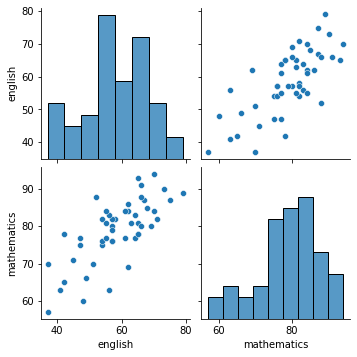

In [ ]:
sns.pairplot( df[['english', 'mathematics']] )

### 형태에 대한 통계
- 자료의 분포나 왜곡된 형태
  - 왜도(skewness) : 편향, 중심을 기준으로 좌우의 데이터가 편향되어 있는 형태를 나타내는 수치
  - 첨도(kurtosis) : 뾰족함의 정도

  ![](https://t1.daumcdn.net/cfile/tistory/994FDB3F5D65168524)

## 추론통계
- 표본을 통해서 모집단을 추론하는 과정
  - 모집단 : 우리가 알고자 하는 것  / ex) 전체인구

  ![](https://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2012/07/big_picture_producing_data.gif)

- 통계를 대하는 자세
  - 마크 트웨인
    - 거짓말의 3가지 종류: 거짓말, 새빨간 거짓말, 그리고 통계
    - 통계가 모집단의 모든 특징을 전부 설명할 수 없다
  - 통계의 한계
    - 일단! 모집단의 특성을 표본을 통해서 통계로 설명한다는 것은 매우 괜찮은 생각입니다. 
    - 표본의 특성이 꼭 모집단과 같을거라는 보장이 없다
      - 표본이 모집단을 대표하는 특성인지 아닌지, 알 수 있는 방법도 없다
      - 누구도 알 수 없다.
    - 표본을 통해서 모집단의 평균은 알 수 없지만 추측은 가능
        - 추측이니깐 99%의 확률로 맞을수도 있지만, 1%의 확률로 틀렸을 가능성 또한 반드시 존재
  - 모집단을 알 수 없습니다. 
    - 모집단은 시간이 지나면서 변하기 때문에 표본이 모집든을 완벽하게 설명하는 것은 불가능
    - 일반적으로 ML/DL에서 하려는 건 과거의 데이터를 이용해서, 현재나 미래를 설명하고 싶은건데(이게 말이 되는가?)


- 이후 수업시간에 얘기하는 확률과 통계는 모집단을 가정하고 진행

- 통계를 사용하지 않을수는 없다. 
  - 통계가 아니고는 대규모의 데이터를 해석할 수도 없고, 설명도 안됩니다.
  - 자료간의 다소의 차이는 있겠지만, 공통적인 특징은 확인할 수 있습니다. 
    - 코로나 백신의 효능을 증명하려면?
      - 화이자나, 얀센등의 효과는 어떻게 나온 것인가?
      - 표본지역을 정해놓고 먼저 접종을 진행한 후에 감염되는 사람수를 센 것 

  - 통계는 항상 거짓말로부터 출발한다는 사실을 알고 있어야 합니다. 
    - 그래서 여러분들은 스스로 입증해야만 합니다.
  - 잘 쓰면 굉장한 무기가 되지만, 그렇지 않으면? 
  - 주사위 문제, 동전 던지기
    - 주사위나 동전을 던져서 확률적 데이터를 얻는다고 가정
    - 이때 이 주사위나, 동전은 공정할 것인가? 
    - 던지는 사람이 매번 똑같은 힘으로 동일한 방향에 던질 수 있다?
    - 무한히 반복해서 주사위를 던지면, 제 아무리 강철로 만들어져 있어도 주사위 모양은 변하지 않을까? 

## 모집단과 표본

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/데이터교육/수업자료/통계와 확률/소스코드/data/ch4_scores400.csv')
scores = np.array(df['score'] )
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

### 복원 추출과 비복원 추출

#### 복원 추출

In [ ]:
np.random.choice( scores, 20 )

array([56, 79, 65, 83, 46, 62, 76, 55, 78, 78, 96, 86, 77, 46, 97, 61, 98,
       64, 75, 49])

#### 비복원 추출

In [ ]:
np.random.choice( scores, 20, replace=False )

array([76, 87, 91, 86, 80, 63, 68, 72, 77, 55, 73, 66, 54, 74, 58, 67, 83,
       67, 73, 70])

In [ ]:
for i in range(5) :
  sample = np.random.choice( scores, 20 )
  print('{}번째 무작위 추출 얻은 표본 평균 : {}'.format(i+1, sample.mean()))

1번째 무작위 추출 얻은 표본 평균 : 69.35
2번째 무작위 추출 얻은 표본 평균 : 70.15
3번째 무작위 추출 얻은 표본 평균 : 64.0
4번째 무작위 추출 얻은 표본 평균 : 68.65
5번째 무작위 추출 얻은 표본 평균 : 66.1


In [ ]:
# 모집단의  평균    /// 위와 다른 이유는 모집단이 다르기 때문에 평균값이 다를 수 밖에 없다
scores.mean()

69.53

# 확률
- 미래에 발생할 사건에 대한 믿음에 대한 측정값
  - 내일 비가 올 확률이 70%다
- 물리, 화학, 사회 과학 등에서 발생하는 관심 현상의 측정값을 불확실성에 의해 예측할 수 없는 경우에 사용
  - 동전을 던졌을 때(앞,뒤|1/2)
  - 동전을 던졌을 때 앞이 나오면 앞으로 한칸 이동 뒷면이 나오면 뒤로 한칸 이동
  - 동전을 던지는 시행을 여러번(무한히)했을 경우, 결국 원점으로 돌아와야 한다. 
- 이런 상환을 랜덤이라고 하며, 랜덤이라고 해도, 이 사건에 대한 상대 빈도 정보가 이미 있다면 예측도 가능

## 빈도론적 확률
- 우리한테 일반적으로 잘 알려져 있는 확률(고전 확률)
- 어떤 사건을 반복해서 관찰(수집)했을 때, 발생하는 상대 빈도수를 확률로 정의
- 어떤 사건이 무한히 반복된다고 가정 했을 때, 이 사건이 발생할 확률을 상대빈도로 정의
  - 시행을 한 번도 안했거나, 한 번뿐인 사건은 정의가 되지 않는다.
  - 현실적으로, 무한히 시행을 하는 것은 불가능하기 때문에, 실제 확률값을 알 수 없는 경우가 더 많다.

- 수집된 자료들의 변수들도, 확률적으로 주어지는 값으로 해석
  - 꼭, 주사위를 던지거나 동전을 던져서 관찰된 값만 확률적인 값으로 보지 않습니다. 
  - 수집된 자료의 변수 x들도 전부 확률적으로 주어진 값으로 해석 
  - 변수 x들을 `확률변수`라고 부릅니다. 

- 동전 던지기의 역사
  - 앞면이 나왔을 때를 성공이라고 가정
  - 1707-1788(Count Buffon): 4040번 동전 던지기 실험 앞(2048회) = 0.5069
  - 1900(Karl Pearson): 24,000번 동전 던지기 앞(12,012) = 0.5005
  - John Kerrich: 10,000번 던지기 앞(5067) = 0.5067

## 확률의 공리
- 확률의 단순한 정의
- 확률은 항상 0보다 크거나 같고, 1보다 작거나 같다. 

$$
  0 \le \mathbb{P} \le 1
$$

- 전체사건을 S에 대해서, 각각의 사건들이 상호배반적($A \cap B = \phi$) 이라면, 각 사건들이 발생하는 확률은 각 확률을 더한것과 같다. 

$$
  \mathbb{P}(S) = 1
$$

- 주사위를 던졌을 때, 1 또는 2가 나올 확률은 1이 나올 확률과 2가 나올 확률을 더한것과 같다. 

$$
  \begin{align}
    \mathbb{P}(S) & = 1/6 + 1/6 + 1/6 + 1/6 + 1/6 + 1/6 = 1 \\ 
    \mathbb{P}(1) + \mathbb{P}(2) & = 1/6 + 1/6
  \end{align}
$$

## 확률분포    : 확률변수들의 분포

In [ ]:
dice = [ 1, 2, 3, 4, 5, 6 ]
prob = [ 1/21, 2/21, 3/21, 4/21, 5/21, 6/21 ] 

In [ ]:
num_trial = 100
sample = np.random.choice( dice, num_trial, p=prob)
sample

array([3, 3, 2, 4, 2, 4, 3, 6, 2, 2, 4, 1, 5, 3, 4, 4, 2, 4, 6, 6, 1, 2,
       2, 5, 2, 4, 4, 1, 6, 5, 4, 5, 3, 5, 4, 6, 4, 5, 4, 3, 4, 5, 3, 6,
       4, 4, 5, 6, 5, 3, 5, 3, 6, 3, 5, 2, 5, 5, 5, 5, 6, 6, 5, 4, 5, 2,
       6, 6, 5, 3, 6, 6, 4, 5, 6, 5, 6, 4, 4, 6, 4, 6, 5, 6, 6, 5, 1, 6,
       5, 5, 6, 1, 2, 6, 3, 2, 6, 4, 6, 2])

In [ ]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame( {'빈도수':freq, '상대 빈도수':freq/num_trial}, index=pd.Index(np.arange(1,7), name='dice'))

,빈도수,상대 빈도수
dice,,
1,5,0.05
2,13,0.13
3,12,0.12
4,21,0.21
5,24,0.24
6,25,0.25


빈도수 : 확률변수

- 시행 횟수가 많아 질수록 위 모집단의 분포(확률분포)를 따라 간다

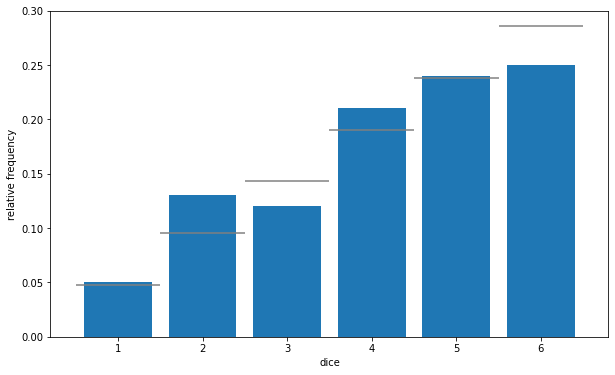

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

아래와 같이 시행횟수가 많을 수록 확률분표와 비슷하게 나올 것이다    / 대수의 법칙

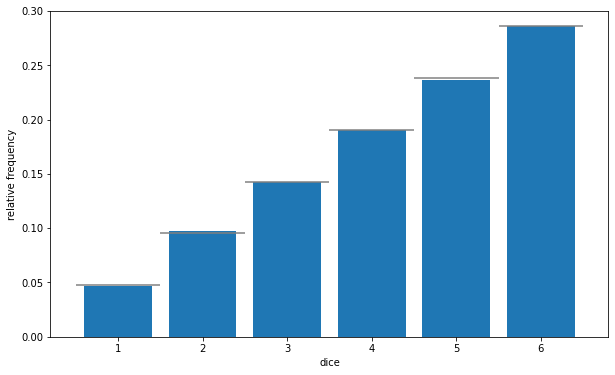

In [ ]:
num_trial = 100000
sample = np.random.choice( dice, num_trial, p=prob)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추론통계에서의 확률
- 교재 4.3(p.106)

In [ ]:
scores

array([ 76,  55,  80,  80,  74,  61,  81,  76,  23,  80,  41,  80,  68,
        88,  69,  57,  68,  86,  70,  68,  81,  73,  70,  90,  93,  79,
        66,  92,  88,  81,  52,  72,  59,  68,  74,  72,  63,  89,  45,
        81,  42,  76,  57,  83,  71,  74,  55,  60,  73,  79, 100,  73,
        85,  47,  50,  65,  52,  92,  64,  91,  92,  71,  78,  69,  78,
        77,  68,  78,  96,  81,  75,  72,  55,  55,  75,  49,  59,  89,
        99,  45,  94,  67,  70,  68,  86,  46,  77,  56,  79,  93,  70,
        76,  76,  58,  93,  96,  81,  71,  63,  61,  96,  91,  69,  46,
        28,  54,  68,  91,  60,  78,  90,  72,  68,  50,  52,  76,  67,
        72,  69,  80,  58,  65,  98,  58,  66,  61,  77,  85,  63,  64,
        66,  78,  59,  64,  34,  49,  68,  83,  74,  54,  49,  73,  45,
        86,  71,  46,  56,  59,  58,  48,  57,  60,  59,  87,  72,  55,
        65,  57,  65,  83,  74, 100,  76,  56,  82,  86,  86,  54,  68,
        87,  45,  63,  49,  56,  55,  89,  66,  57,  54,  72,  7

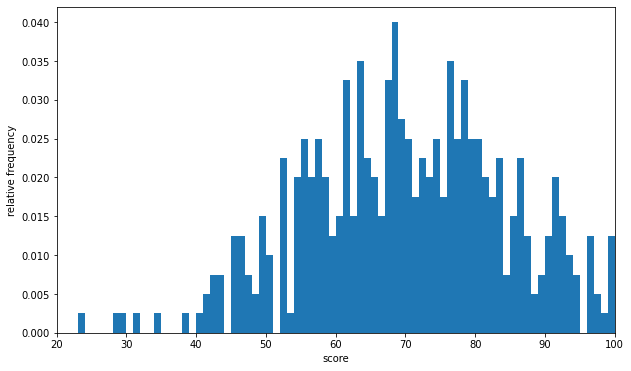

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

#### 표본 크기가 커지면 실제 분포에 수렴
- 표본크기 (10000)

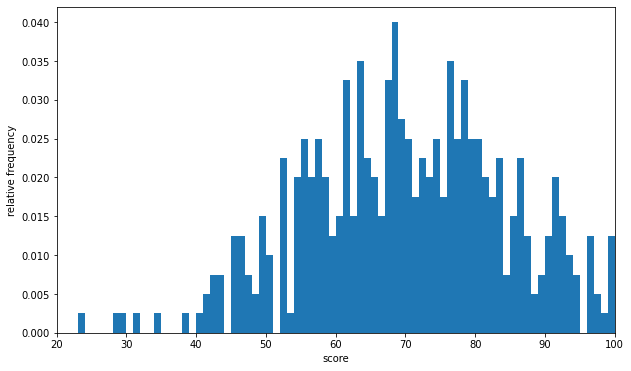

In [ ]:
sample = np.random.choice( scores, 10000 )

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

과연 표본들의 평균은 모평균을 잘 설명할 수 있을까?
- 주어진 점수에서 20개의 표본을 골라서 표본평균을 계산
  - 10000번 수행했을 때의 표본평균의 분포는?

In [ ]:
sample_means = []
for _ in range(10000) :   # 10000번 수행
  sample_means.append( np.random.choice( scores, 20 ).mean() )   # 20개의 표본

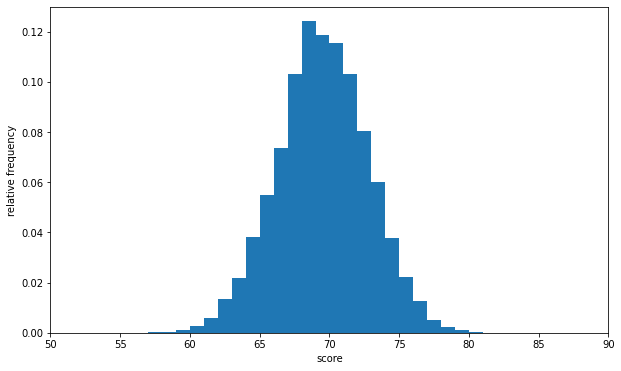

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [ ]:
np.mean(scores)

69.53

## 확률변수와 확률분포
- 잘 알려진 확률분포들에 대해서 확인을 합니다. 
- 교재는 챕터06, 챕터 08에 해당 합니다.

### 확률변수 
- 확률적인 과정에 따라서, 값이 결정되는 변수/함수를 `확률변수`라고 합니다. 
  - 수집된 자료의 변수(Feature)X들도 어떤 확률적인 과정에 따라서 주어지는 값으로 해석


두개의 주사위 합이 x가 나올 확률이 (36/y)라고 했을때
변수 X가 x가 될 확률



### 확률분포
- 확률변수가 특정한 값을 가지게 될 확률을 나타내는 함수를 `확률분포`라고 합니다. 
- 현실세계의 자료는 확률분포를 알 수 없는 경우가 더 많기 때문에, 일반적으로 잘 알려진 확률분포를 가정

#### 이산확률변수 
- 확률변수가 이산적인(비연속적, 떨어진) 값을 가 질때, 이 변수를 `이산확률변수`라고 합니다. 
  - 셀수 있는 값이거나, 범주형 자료들이 이에 해당합니다. 
  - 대표적인 분포는 `베르누이 분포`, `이항 분포` 등이 있습니다. 
- 이때의 확률분포를 확률변수 x의 `확률질량함수(PMF/Probability Mass Function)`라고합니다. 
  - 확률분포를 알고 있으면, 확률질량함수를 알 수 있고, 확률질량함수를 알고 있으면, 확률분포를 알 수 있습니다. 
  - 이산확률변수의 확률분포 = 확률질량함수



- 이산(discrete) 확률 변수 :, 확률변수가 연속적이지 않고 분리되어 있는 값을 가진다는 의미입니다. 예를 들어, 정육면체의 주사위(1, 2, 3, 4, 5, 6의 면을 가지고 있는)를 두 번 던졌을 때 나오는 두 개 숫자의 합과 같은 경우 이산 확률 변수에 해당합니다. 이산 확률 변수는 취할 수 있는 값이 유한하거나, 혹 무한하다면 셀 수 있어야(예) 정수의 값을 취하는 등) 합니다


- 확률질량함수 : 각각의 확률 변수에 대한 가능성(likelihood)이 어느 정도인지를 나타내는 함수





#### 이산확률분포
- 베르누이 분포
  - 가능한 사건의 경우가 두 가지로 구분되는 시행을 `베르누이 시행` 이라고 합니다. 
    - 성공, 실패로 구분되는 경우가 대표적으로 사용되는 분포
    - 동전 던지기 => 앞면이 나오는 경우(성공), 뒷면이 나오는 경우(실패)
    - 복권 당첨의 여부
    - 주사위를 던졌을 때, 특정 눈금이 나오는 경우(성공), 나머지는 실패로 간주
  - 베르누이 시행은 0(실패), 1(성공)으로 구분해서 간단하게 나타나게 됩니다. 

In [ ]:
from scipy.stats import bernoulli, binom, poisson

주사위를 던졌을 때, 특정 눈금이 나오는 경우를 성공이라고 가정
  - 1이 나오는 경우를 성공이라고 가정
  - 성공확률이 1/6인 베르누이 분포를 따른다고 할 수 있습니다. 
  - 표본의 자료가 베르누이 분포를 따른다면, 모집단에서의 성공확률을 알고 싶은거죠

In [ ]:
rv = bernoulli(1/6)

파이썬에서는 생성된 객체의 pmf 메소드를 통해서 확률질량함수를 계산할 수 있습니다. 

In [ ]:
x = [0, 1]
rv.pmf(x)

array([0.83333333, 0.16666667])

왼쪽이 실패, 오른쪽이 성공  / 합치면 1

모집단에서의 확률분포

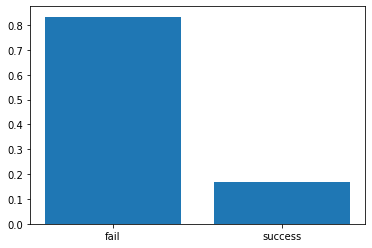

In [ ]:
plt.bar(x, rv.pmf(x) )
plt.xticks( [0, 1], ['fail', 'success'])
plt.show()

표본추출
- 파이썬에서는 각 객체들 마다 난수를 생성하는 함수들을 지원
  - 주사위를 100번 정도 던져서 1이 몇번 정도 나오는지를 알고 싶다고 가정
  - 성공확률이 1/6인 베르누이 분포에서 표본을 추출하는 것과 동일 합니다. 
  - 과연 100번 수행한 결과가 베르누이 분포를 따르는가?

In [ ]:
count = 100
x = rv.rvs( count )    # rvs 함수를 통해 샘플 추출 가능
x

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

그렇다면 샘플의 분포는?

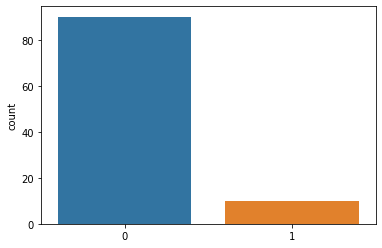

In [ ]:
sns.countplot(x)
plt.show()

In [ ]:
np.bincount (x)  # 100번 동안 이와 같은 수가 나옴

array([90, 10])

In [ ]:
np.bincount (x) / count   # 100번으로 나누면 비율이 나옴

array([0.9, 0.1])

결국 시행이 무한히 많아지면 모집단의 분포와 같아질 것

In [ ]:
count = 10000
x = rv.rvs( count )    # rvs 함수를 통해 샘플 추출 가능


In [ ]:
np.bincount (x)

array([8300, 1700])

In [ ]:
np.bincount (x) / count

array([0.83, 0.17])

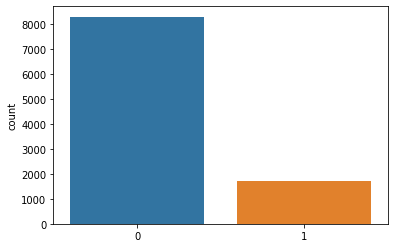

In [ ]:
sns.countplot(x)
plt.show()

이와 같이 비슷해짐

이항분포(binom distribution)
- 베르누이 시행을 여러번 했을 경우의 분포
- 주사위를 10번 던졌을 때 1이 나오는 경우를 성공이라고 가정

In [ ]:
# 이항분포는 시행횟수가 1이면 베르누이 분포와 같습니다. 
binom(1, 1/6).pmf([0,1])

array([0.83333333, 0.16666667])

In [ ]:
rv = binom(10, 1/6)

In [ ]:
x = np.arange(11)
rv.pmf(x)

array([1.61505583e-01, 3.23011166e-01, 2.90710049e-01, 1.55045360e-01,
       5.42658759e-02, 1.30238102e-02, 2.17063503e-03, 2.48072575e-04,
       1.86054431e-05, 8.26908584e-07, 1.65381717e-08])

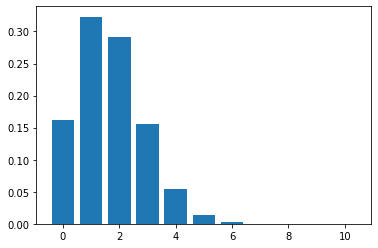

In [ ]:
plt.bar( x, rv.pmf(x) )
plt.show()

10번 던졌을때 1이 나올 확률의 분포 : 이항분포

표본추출

In [ ]:
x = rv.rvs(10000)

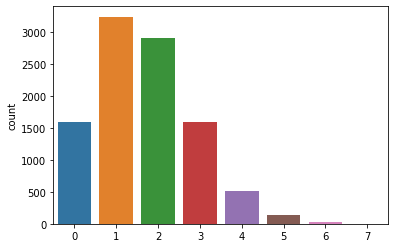

In [ ]:
sns.countplot(x)
plt.show()

주사위 10번을 10000번씩해서 1 연속으로 나온 횟수 분포

누적분포함수
- 주어진 확률변수가 특정값보다 크거나 작아질 확률
- 누적분포함수는 항상 0과 1사이의 값을 가지게 됩니다.
- 주사위를 10번 던졌을 때, 1이 3번 이하 나오게 될 확률은?

파이썬에서는 cdf함수를 누적분포 함수를 계산해볼 수 있습니다.

In [ ]:
x = np.arange(11)
rv.cdf(x)

array([0.16150558, 0.48451675, 0.7752268 , 0.93027216, 0.98453803,
       0.99756184, 0.99973248, 0.99998055, 0.99999916, 0.99999998,
       1.        ])

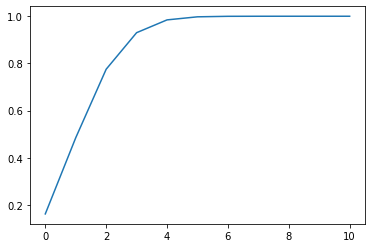

In [ ]:
plt.plot(x, rv.cdf(x) )
plt.show()

1이 3번 이하가 나오게 될 확률은

In [ ]:
prob = rv.cdf(x)
prob[3]

0.9302721574455114

포아송 분포
- 시간이나, 면적등을 구간으로 나눠서 표현
- 각 구간별 사건은 독립적이고, 사건의 발생확률은 동일(베르누이 동일)
- 각 구간의 사건 발생확률은 구간의 크기에 비례
- 정해진 시간 안에 어떤 사건이 일어날 횟수에 대한 값을 람다라고 한다면
  - 사건이 k회 일어날 확률

하루평균 2건의 교통사고가 발생하는 지역에서, 하루 교통사고 발생 건수

In [ ]:
rv = poisson(2)

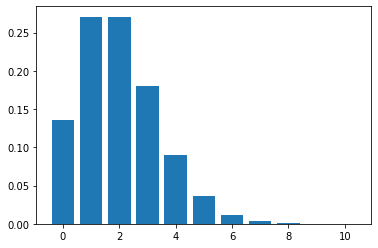

In [ ]:
x = np.arange(11)
plt.bar(x, rv.pmf(x) )
plt.show()

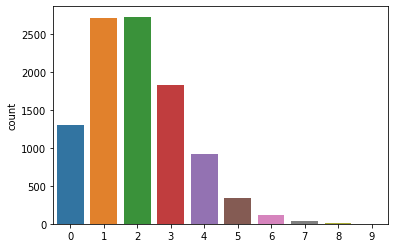

In [ ]:
x = rv.rvs(10000)   # 10000번 했을 때 사고횟수의 분포
sns.countplot(x)
plt.show()

In [ ]:
x.mean()   # 평균

2.0093

#### 연속확률변수 
- 확률변수가 연속적인 값을 가지는 경우를 `연속확률변수`라고 합니다. 
  - 이때의 확률분포를 확률변수의 `확률밀도함수(PDF/Probability Density Function)`라고 합니다. 
  - 수업시간에는 가장 대표적인 `정규분포`를 살펴봅니다. 

정규분포(Normal Distribution)
- 통계학자들이 가장 사랑하는 분포
- 수학자 가우스에 의해서 처음 알려졌고, `가우스 분포`로도 잘 알려져 있습니다. 
- 선형회귀 모형에서는 자료의 분포, 오차항의 분포를 정규분포로 가정을 합니다. 
- 평균이 0이고, 표준편차가 1인 정규분포를 `표준정규분포`라고 합니다. 

In [ ]:
from scipy.stats import norm

In [ ]:
rv = norm( loc=0, scale=1 )

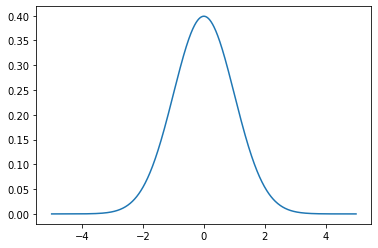

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, rv.pdf(x) )
plt.show()

정규분포의 누적분포함수
- 정규분포의 누적분포함수는 구할 수 없음이 알려져 있는데 
  - 파이썬은 근사치의 결과를 돌려줍니다. 

- 일반화선형모형에서 logit함수나 딥러닝에서 활성화 함수 등이 정규분포의 누적분포함수를 사용을 하게 됩니다. 

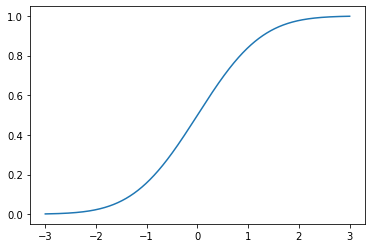

In [83]:
x = np.linspace(-3, 3, 1000)
plt.plot(x, rv.cdf(x) )
plt.show()

# 중심극한의 정리
- 물론 증명도 되어 있고, 통계적 모형을 세울때, 정규분포를 사용할 수 있는 중요한 이론
  - 너무 맹신하거나, 오해 하는 경우가 많아요
- 모집단의 분포가 무엇이든 상관이 없이 
  - 어떤 분포를 갖든 동일하기만 하면 상관이 없습니다. 
  - 표본들의 평균은 결국 정규분포로 수렴하게 된다.
    - 단, 표본의 크기가 충분 하다면

  - **중요한 것은 자료의 분포가 정규분포임을 증명하지 않습니다**

- 표본이 얼마나 커야 충분히 크다고 얘기할 수 있는가? 
- 표본의 크기가 정말 충분히 크다면, 그 평균들은 정말 정규분포가 되는가? 
- 수업시간에는 균등분포를 가정
  - 각 구간마다 동일한 분포를 갖는 형태

In [84]:
from scipy.stats import uniform

In [85]:
n = 20
m = 100000
mean = []

rv = uniform(n)
for _ in range(m):
  x = rv.rvs(n)
  mean.append(x.mean())

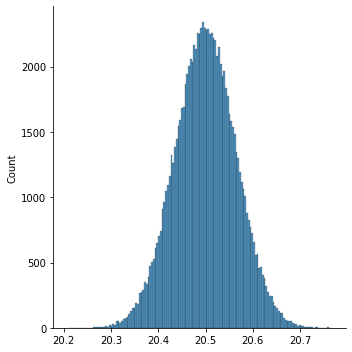

In [86]:
sns.displot(mean)

# 몬테카를로 시뮬레이션
- 난수를 이용해서 시행하는 모의실험
- 맨하탄 프로젝트에서 처음 시작
  - 핵무기 연구에 사용
  - 아주 많은 연산을 필요로 하는 경우에, 효과적인 알고리즘이 필요
  - 난수를 이용해서 푸는 방법을 제안

## 도박사의 몰락
- 도박사는 과연 얼마만에 파산을 할 것인가? 
- 이런 경우에는 확률분포를 가정하기 어렵습니다. 
- 이런 경우에, 시뮬레이션을 통해서 표본을 추출하고, 이를 통해서 모집단의 모수를 추정
  - 모수란: 평균, 분산, ... 

## 카지노의 승률
- 카지노마다 승률이 다르게 설정이 되어 있고
- 게임마다 승률이 전부 다릅니다. 
- 일반적으로는 승률이 49%를 넘어가지 않습니다. 
  - 성공할 확률이 49%인 베르누이 분포를 생각해볼 수 있습니다. 

In [87]:
# 초기자금이 10,000원이고
# 49%의 확률로 100원을 따거나, 51%의 확률로 100원을 잃는 베르누이 분포를 가정
# 도박사는 얼마만에 파산할 것인가?(파산하지 않는 경우는 고려하지 않는가?)

n = 10000
p = 0.49
r = []
x = [-100, 100]

while True:
  i = bernoulli(p).rvs(1)[0]
  n += x[i]
  r.append(n)
  if n < 0: break

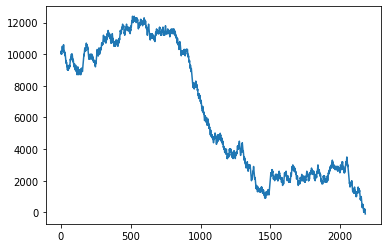

In [88]:
plt.plot(r)
plt.show()

위 내용을 가지고 돈을 잃는 횟수의 평균을 구하려 한다.
총 시뮬레이션 횟수는 1000번.
자본값 10000원
획득 횟수 49%, 잃는 횟수 51%

In [89]:
# 49% 확률 100원 땀, 51%로 잃음

p = 0.49
m = []
x = [-100, 100]

for _ in range(1000) :
  n = 10000
  cnt = 0
  while True :
    cnt += 1
    i = bernoulli(p).rvs(1)[0]
    n += x[i]
    if n < 0 : break
  m.append(cnt)

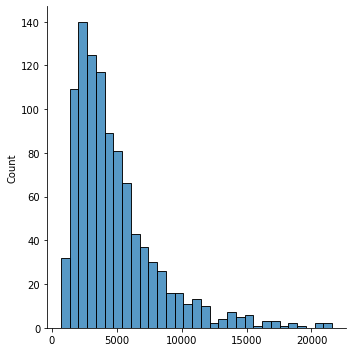

In [92]:
sns.displot(m)
plt.show()

확률분포에서 평균과 분산을 확인

In [93]:
print( np.mean(m) )
print( np.var(m) )
print( np.std(m) )

4836.14
10757399.172400001
3279.847431268717
